In [7]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install xgboost
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:02


# Machine Learning Project: Bank Marketing Dataset

## Loading Packages

In [8]:
import os

In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder,StandardScaler

In [11]:
sns.set_theme(context='paper', style="darkgrid")

## Loading Dataset

In [13]:
# Load the dataset
dir_path = './bank+marketing/bank-additional'
file_name = 'bank-additional-full.csv'
# file_name = 'bank-additional.csv'
file_path = os.path.join(dir_path, file_name)
print(f"Dataset: {file_path}")
data = pd.read_csv(file_path, sep=';')
data.head()

Dataset: ./bank+marketing/bank-additional/bank-additional-full.csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Dataset Analysis

### Initial analysis

In [14]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


#### Dataset Summary

In [15]:
print("Summary of dataset:")
print(data.info())

Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.i

#### Missing values in table

In [16]:
print("Checking for missing values:")
print(data.isnull().sum())

Checking for missing values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Dataset statistics

In [17]:
print("\nDescriptive statistics:")
data.describe(include='all')


Descriptive statistics:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Data Visualization

#### Categorical features against target

In [18]:
categorical_feature_names = data.drop('y', axis=1).select_dtypes(include=['object']).columns
print(f"Number of categorical features: {categorical_feature_names.shape[-1]}")

Number of categorical features: 10


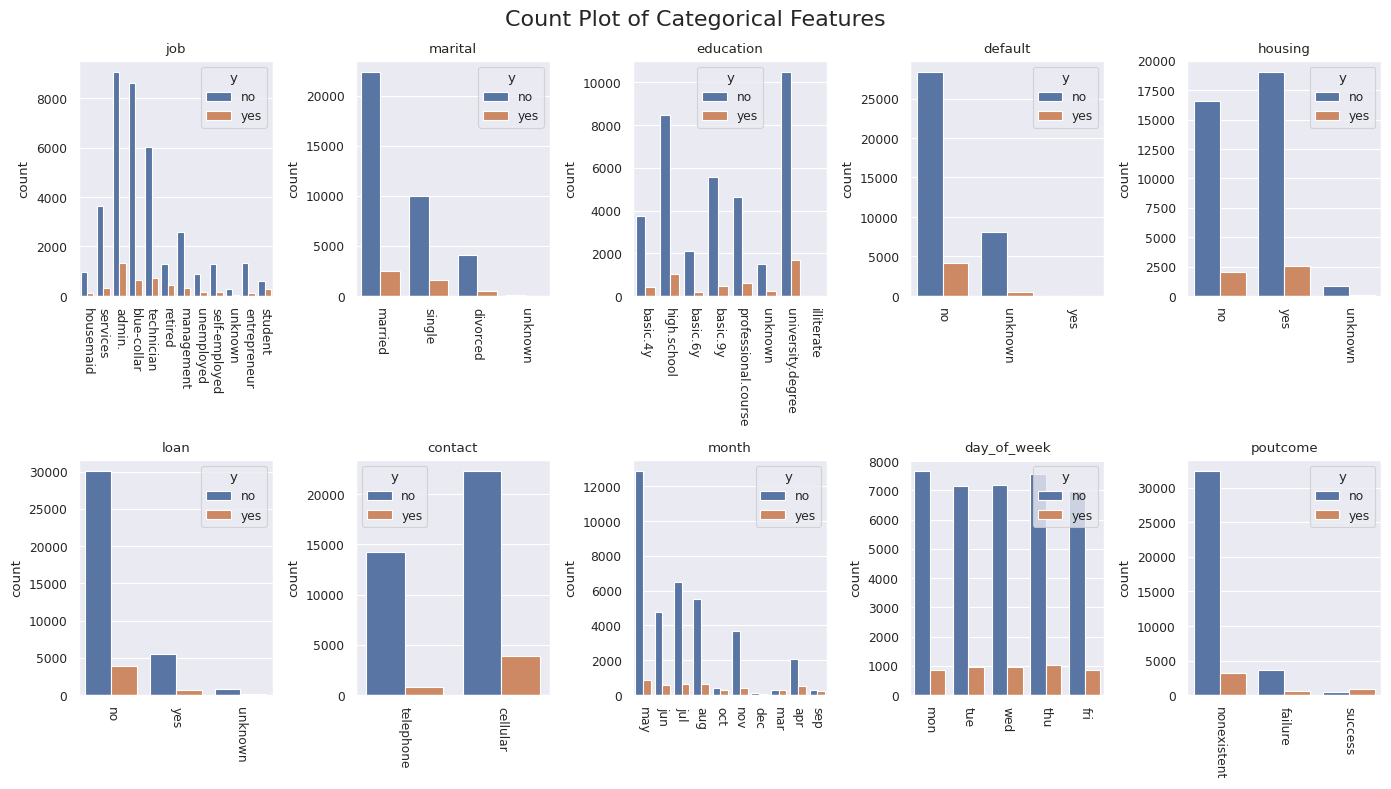

In [19]:
fig=plt.figure(figsize=(14, 8))
for i in range(categorical_feature_names.shape[-1]):
  plt.subplot(2,5,i+1)
  sns.countplot(data=data, x=categorical_feature_names[i], hue='y')
  plt.xticks(rotation=-90)
  plt.xlabel('')
  plt.title(categorical_feature_names[i])
fig.suptitle('Count Plot of Categorical Features', fontsize=16)
plt.tight_layout()

#### Numerical features against target variable

In [20]:
numerical_feature_names = data.drop('y', axis=1).select_dtypes(include=['int', 'float']).columns
print(f"Number of numerical features: {numerical_feature_names.shape[-1]}")

Number of numerical features: 10


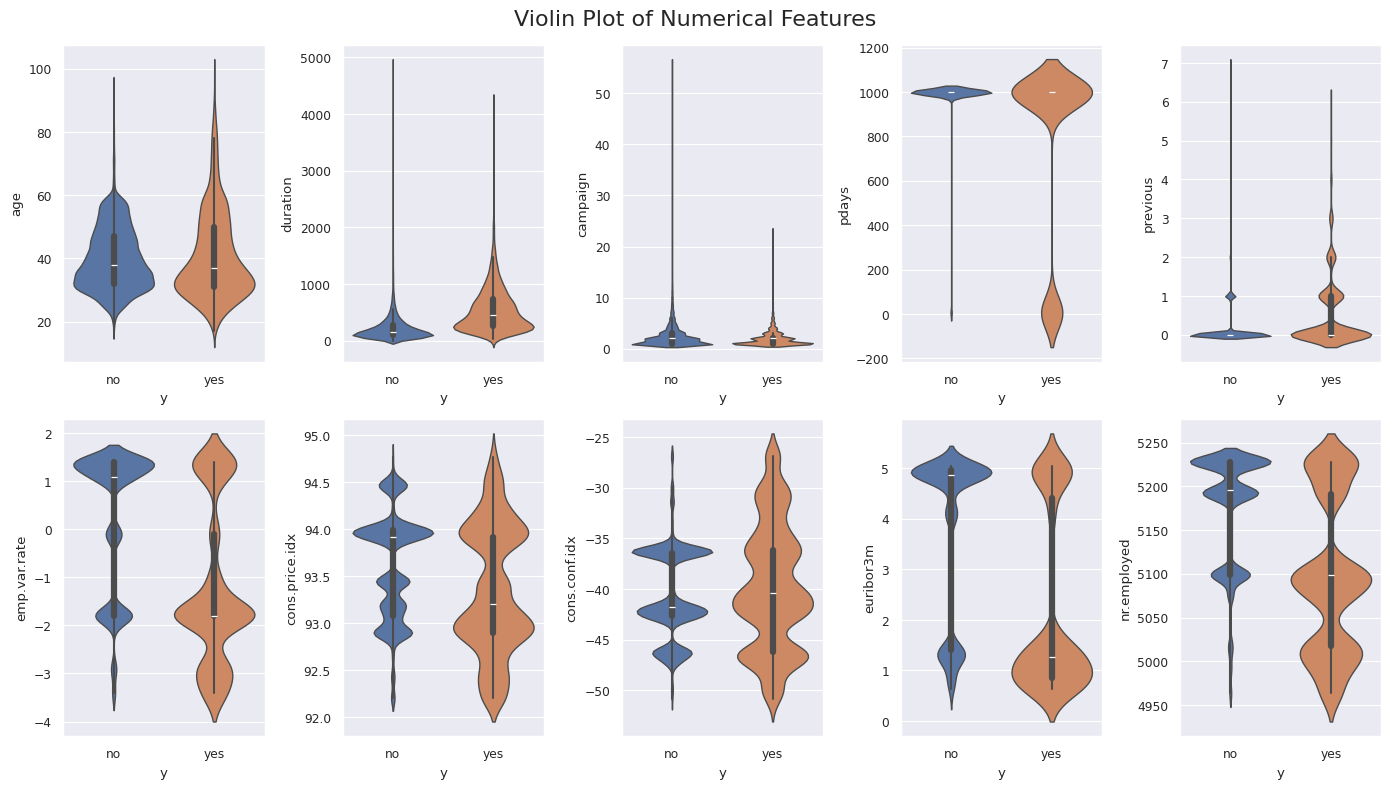

In [21]:
fig=plt.figure(figsize=(14, 8))
for i in range(numerical_feature_names.shape[-1]):
  plt.subplot(2,5,i+1)
  sns.violinplot(data=data,  x='y', y=numerical_feature_names[i], hue='y')
fig.suptitle('Violin Plot of Numerical Features', fontsize=16)
plt.tight_layout()

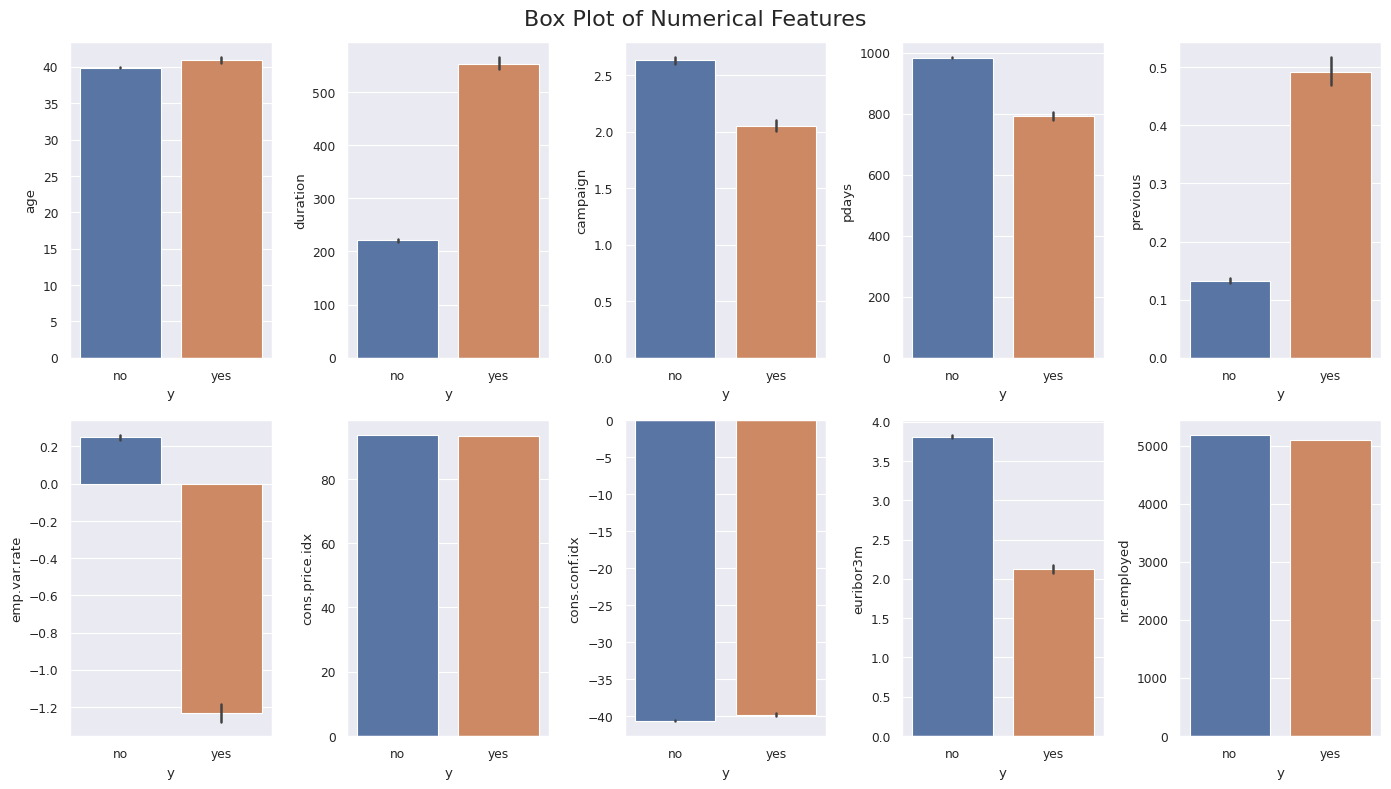

In [22]:
fig=plt.figure(figsize=(14, 8))
for i in range(numerical_feature_names.shape[-1]):
  plt.subplot(2,5,i+1)
  sns.barplot(data=data,  x='y', y=numerical_feature_names[i], hue='y')
fig.suptitle('Box Plot of Numerical Features', fontsize=16)
plt.tight_layout()

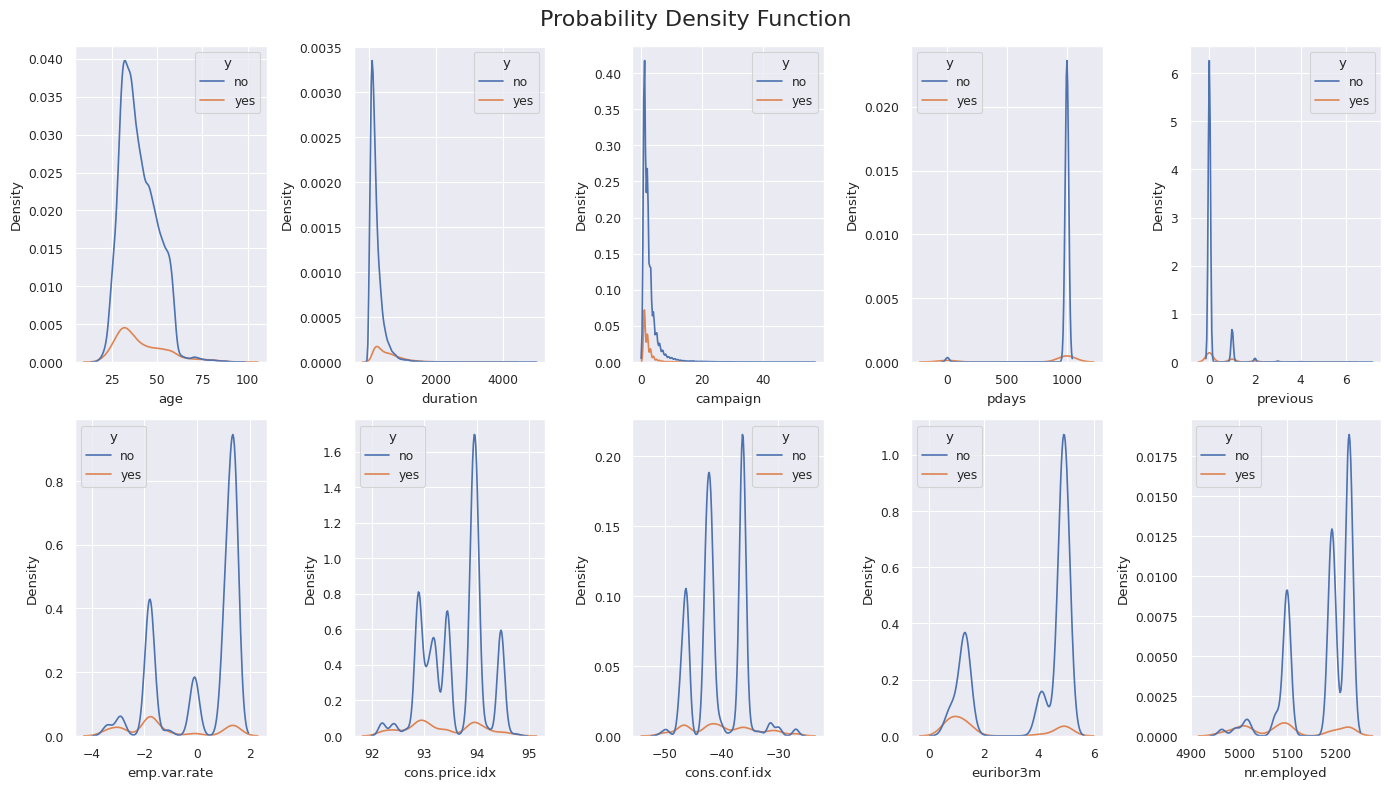

In [23]:
fig=plt.figure(figsize=(14, 8))
for i in range(numerical_feature_names.shape[-1]):
  plt.subplot(2,5,i+1)
  sns.kdeplot(data=data, x=numerical_feature_names[i], hue='y')
fig.suptitle('Probability Density Function', fontsize=16)
plt.tight_layout()

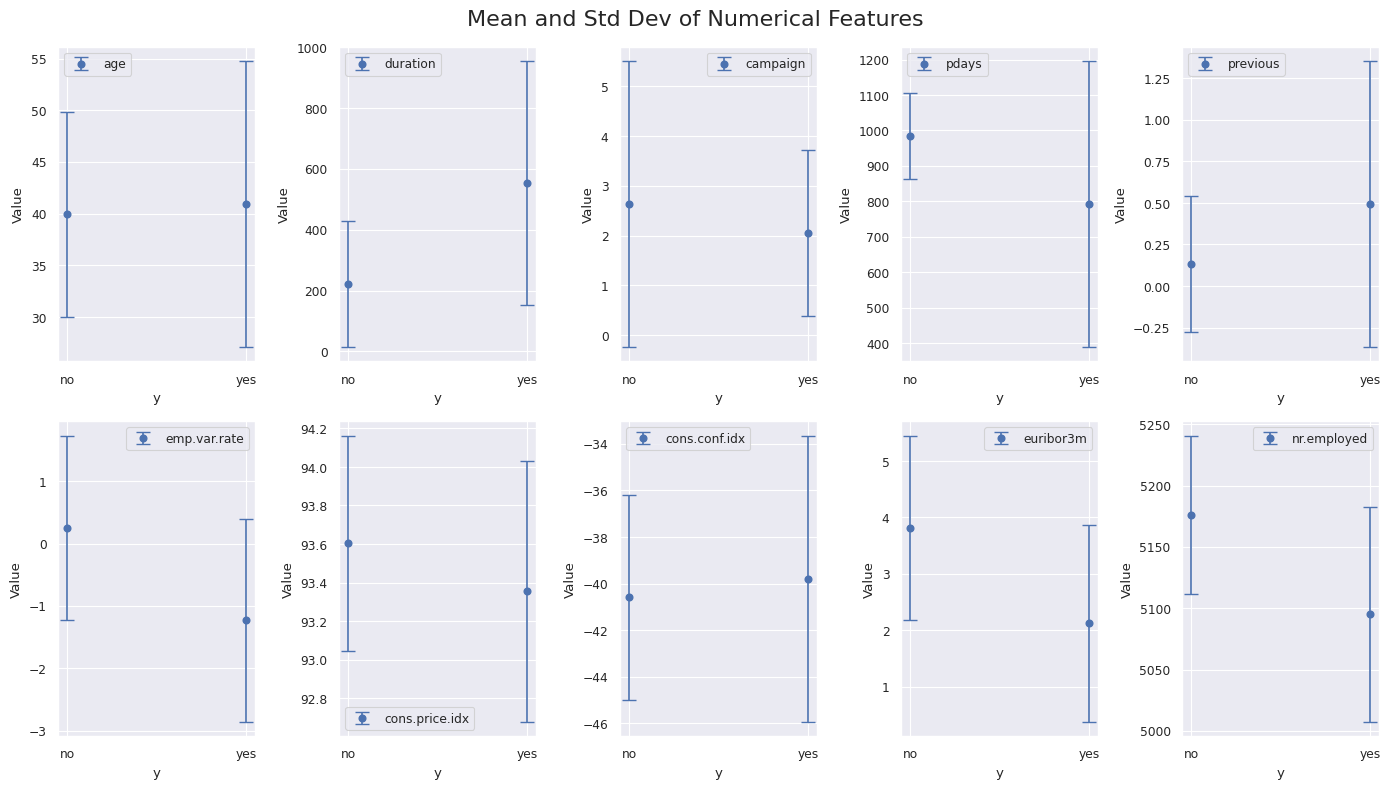

In [24]:
grouped = data.drop(categorical_feature_names, axis=1).groupby('y').agg(['mean', 'std'])
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped.reset_index(inplace=True)

fig=plt.figure(figsize=(14, 8))
for i in range(numerical_feature_names.shape[-1]):
  plt.subplot(2,5,i+1)
  plt.errorbar(grouped['y'], grouped[f'{numerical_feature_names[i]}_mean'], yerr=grouped[f'{numerical_feature_names[i]}_std'], fmt='o', label=numerical_feature_names[i], capsize=5)
  plt.xlabel('y')
  plt.ylabel('Value')
  plt.legend()
fig.suptitle('Mean and Std Dev of Numerical Features', fontsize=16)
plt.tight_layout()

#### Class Balance

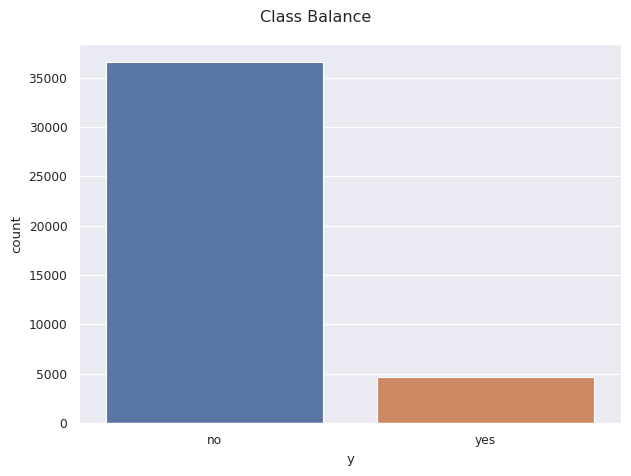

In [25]:
plt.figure()
sns.countplot(data=data, x='y', hue='y')
plt.suptitle("Class Balance")
plt.tight_layout()

## Binary Classification

### Metrics evaluation function

In [26]:
def get_metrics(model_name:str, y_pred, y_true):
    accuracy  = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall    = recall_score(y_true, y_pred, average='binary')
    f1        = f1_score(y_true, y_pred, average='binary')
    roc_auc   = roc_auc_score(y_true, y_pred, average="macro")

    metrics_table = pd.DataFrame({'model': [model_name],
                                  'precision': [precision],
                                  'recall': [recall],
                                  'f1 score': [f1],
                                  'accuracy': [accuracy],
                                  'ROC AUC': [roc_auc]})

    cm = confusion_matrix(y_pred=y_pred, y_true=y_true)

    return metrics_table, cm

### Categorical features encoding

In [27]:
encoder = LabelEncoder()
for col in categorical_feature_names:
    data[col] = encoder.fit_transform(data[col])

data['y'] = encoder.fit_transform(data['y'])

### Feature Correlation

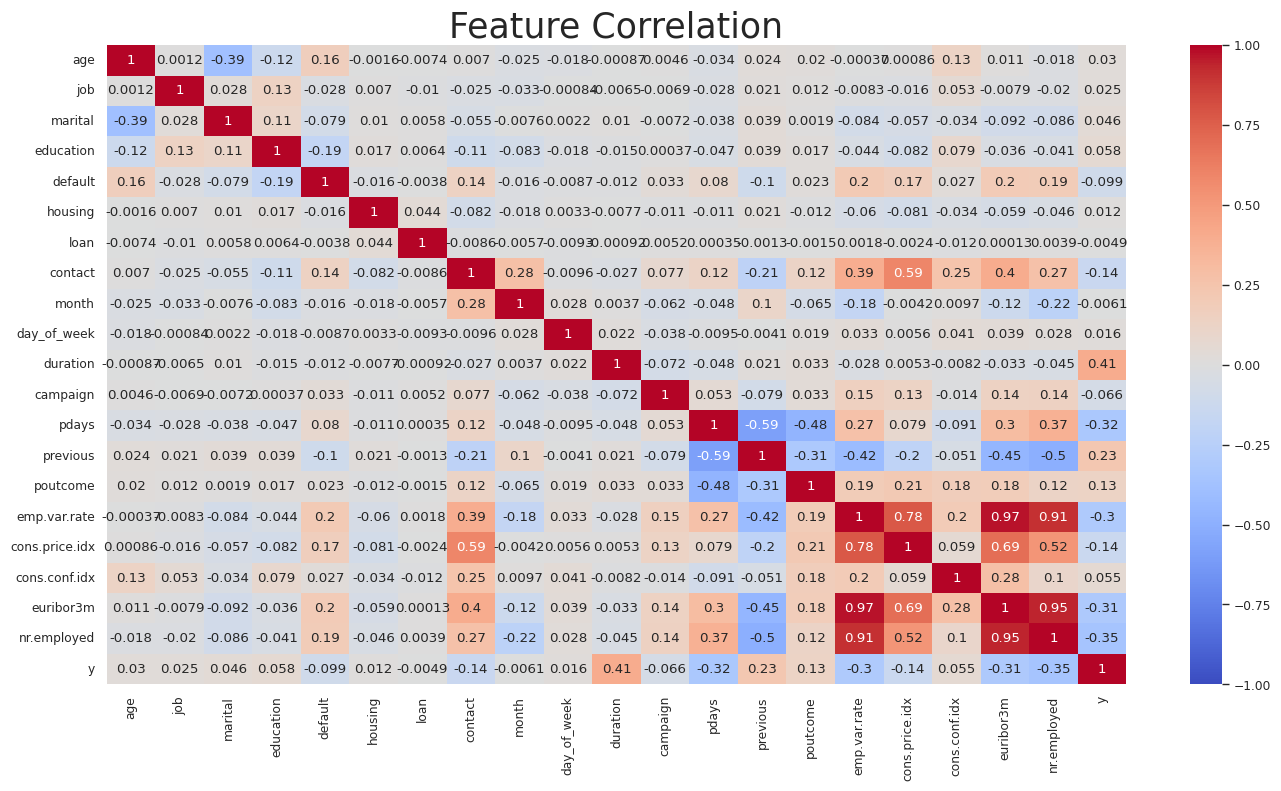

In [28]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='coolwarm')
plt.title('Feature Correlation',fontsize=25)
plt.tight_layout()
plt.show()

In [29]:
ss_scaler = StandardScaler()
data[categorical_feature_names] = ss_scaler.fit_transform(data[categorical_feature_names])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,1,999,0,0.192622,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,1,999,0,0.192622,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,...,1,999,0,0.192622,1.1,93.994,-36.4,4.857,5191.0,0
3,40,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,1,999,0,0.192622,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,...,1,999,0,0.192622,1.1,93.994,-36.4,4.857,5191.0,0


### Train test split

In [30]:
TEST_SIZE = 0.2
feature_names = data.columns.drop('y')
X = data[feature_names]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=42)

### Simple classifier based on class count

In [31]:
from collections import Counter

class ClassCountClassifier:
    def fit(self, y):
      class_counts = Counter(y)
      total_samples = len(y)
      self.class_probabilities = {cls: count / total_samples for cls, count in class_counts.items()}
      self.classes = list(self.class_probabilities.keys())
      self.probabilities = list(self.class_probabilities.values())
      return self.class_probabilities

    def predict(self, X):
        # np.random.seed(seed=42)
        return np.random.choice(self.classes, size=len(X), p=self.probabilities)

In [32]:
class_count_clf = ClassCountClassifier()
class_probabilities=class_count_clf.fit(y_train)
print(class_probabilities)

{0: 0.8873444613050075, 1: 0.11265553869499241}


In [33]:
y_pred = class_count_clf.predict(X_train)
class_count_clf_metrics, class_count_clf_cm = get_metrics("Class Count Classifier", y_pred, y_train)

                 model  precision   recall  f1 score  accuracy  ROC AUC
Class Count Classifier   0.109491 0.111261  0.110369  0.797936 0.498188


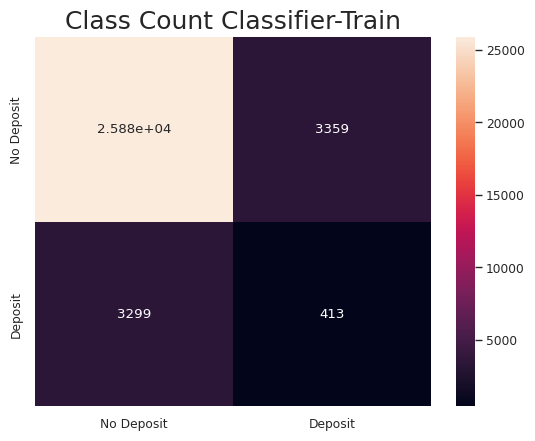

In [34]:
fig, ax = plt.subplots()
ax=sns.heatmap(class_count_clf_cm,annot=True, ax=ax, fmt='.4g')
ax.xaxis.set_ticklabels(['No Deposit','Deposit'])
ax.yaxis.set_ticklabels(['No Deposit','Deposit'])
ax.set_title('Class Count Classifier-Train',fontsize=18)

print(class_count_clf_metrics.to_string(index=False))

### Logistic regression

In [37]:
lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=cv, scoring='f1', refit=True, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
lr_clf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/pc/Documents/MU projekat/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pc/Documents/MU projekat/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pc/Documents/MU projekat/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pc/Documents/MU projekat/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pc/Documents/MU projekat/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pc/Documents/MU pro

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.5732759779610809


In [38]:
y_pred = lr_clf.predict(X_train)
lr_clf_metrics, lr_clf_cm = get_metrics("Logistic Regression", y_pred, y_train)

              model  precision   recall  f1 score  accuracy  ROC AUC
Logistic Regression   0.428363 0.868265  0.573692  0.854628 0.860581


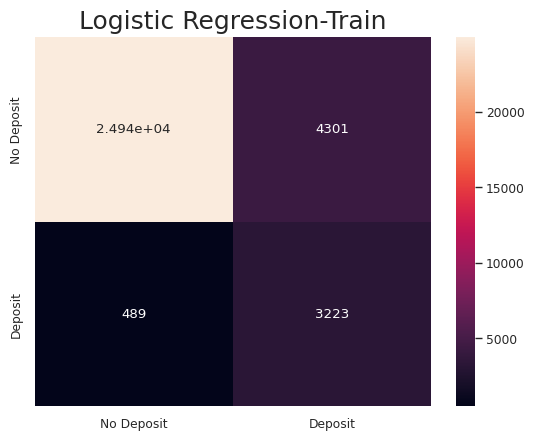

In [39]:
fig, ax = plt.subplots()
ax=sns.heatmap(lr_clf_cm,annot=True, ax=ax, fmt='.4g')
ax.xaxis.set_ticklabels(['No Deposit','Deposit'])
ax.yaxis.set_ticklabels(['No Deposit','Deposit'])
ax.set_title('Logistic Regression-Train',fontsize=18)

print(lr_clf_metrics.to_string(index=False))

### Support Vector Machine

In [40]:
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)

param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='f1', refit=True, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
svm_clf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 1, 'gamma': 0.001}
Best score: 0.573934420125766


In [41]:
y_pred = svm_clf.predict(X_train)
svm_clf_metrics, svm_clf_cm = get_metrics("SVM Classifier", y_pred, y_train)

         model  precision   recall  f1 score  accuracy  ROC AUC
SVM Classifier   0.433077 0.924838  0.589913  0.855144 0.885567


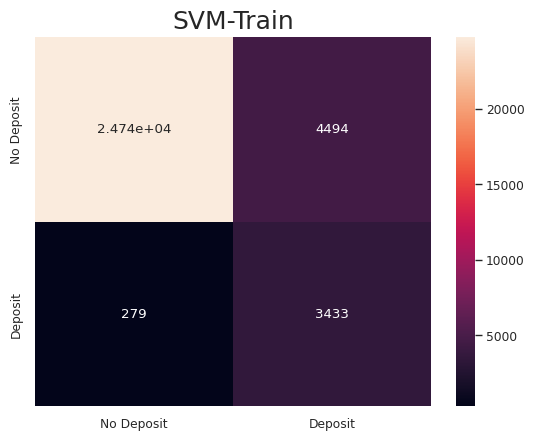

In [42]:
fig, ax = plt.subplots()
ax=sns.heatmap(svm_clf_cm,annot=True, ax=ax, fmt='.4g')
ax.xaxis.set_ticklabels(['No Deposit','Deposit'])
ax.yaxis.set_ticklabels(['No Deposit','Deposit'])
ax.set_title('SVM-Train',fontsize=18)

print(svm_clf_metrics.to_string(index=False))

### Decision Tree

In [43]:
dtree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', random_state=42)
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(dtree, param_grid, cv=cv, scoring='f1', refit=True, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
dt_clf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score: 0.5801383257294856


In [44]:
y_pred = dt_clf.predict(X_train)
dt_clf_metrics, dt_clf_cm = get_metrics("Decision Tree Classifier", y_pred, y_train)

                   model  precision   recall  f1 score  accuracy  ROC AUC
Decision Tree Classifier   0.472839 0.975485  0.636939  0.874719 0.918706


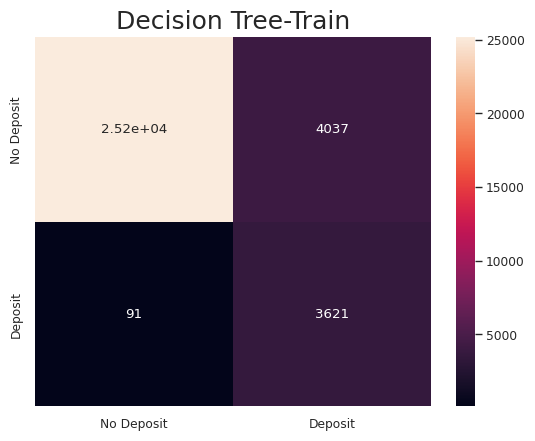

In [45]:
fig, ax = plt.subplots()
ax=sns.heatmap(dt_clf_cm,annot=True, ax=ax, fmt='.4g')
ax.xaxis.set_ticklabels(['No Deposit','Deposit'])
ax.yaxis.set_ticklabels(['No Deposit','Deposit'])
ax.set_title('Decision Tree-Train',fontsize=18)

print(dt_clf_metrics.to_string(index=False))

### Random Forest

In [46]:
rf = RandomForestClassifier(criterion='gini',
                            class_weight='balanced',
                            max_features='sqrt',
                            oob_score=True,
                            bootstrap=True,
                            random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 8, 10]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1', refit=True, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
rf_clf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'max_depth': 10, 'n_estimators': 50}
Best score: 0.6131917036193764


In [47]:
y_pred = rf_clf.predict(X_train)
rf_clf_metrics, rf_clf_cm = get_metrics("Random Forest Classifier", y_pred, y_train)

                   model  precision   recall  f1 score  accuracy  ROC AUC
Random Forest Classifier   0.494489 0.954741   0.65153  0.884947 0.915414
Out Of Bag Score (OOB): 0.8711684370257967


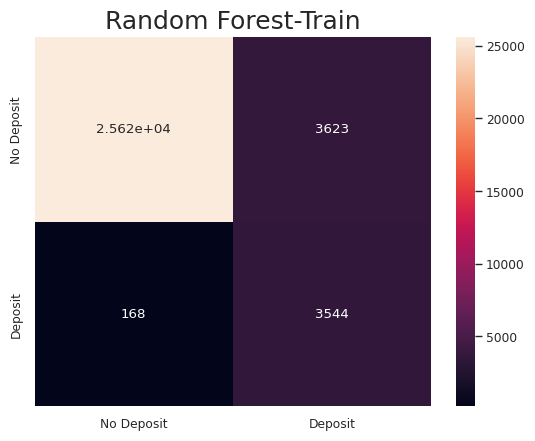

In [48]:
fig, ax = plt.subplots()
ax=sns.heatmap(rf_clf_cm,annot=True, ax=ax, fmt='.4g')
ax.xaxis.set_ticklabels(['No Deposit','Deposit'])
ax.yaxis.set_ticklabels(['No Deposit','Deposit'])
ax.set_title('Random Forest-Train',fontsize=18)

print(rf_clf_metrics.to_string(index=False))
print(f"Out Of Bag Score (OOB): {rf_clf.oob_score_}")

### XGBoost

In [63]:
xgb = XGBClassifier(scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(), random_state=42)

param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.05, 0.1, 0.3], # eta in xgboost documentation - shrinkage
              'max_depth':[4, 6, 8, 10]
              }

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=cv, scoring='f1', refit=True, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
xgb_clf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}
Best score: 0.6302911493186312


In [64]:
y_pred = xgb_clf.predict(X_train)
xgb_clf_metrics, xgb_clf_cm = get_metrics("XGBoost", y_pred, y_train)

  model  precision   recall  f1 score  accuracy  ROC AUC
XGBoost   0.652136 0.999461  0.789278  0.939879 0.965888


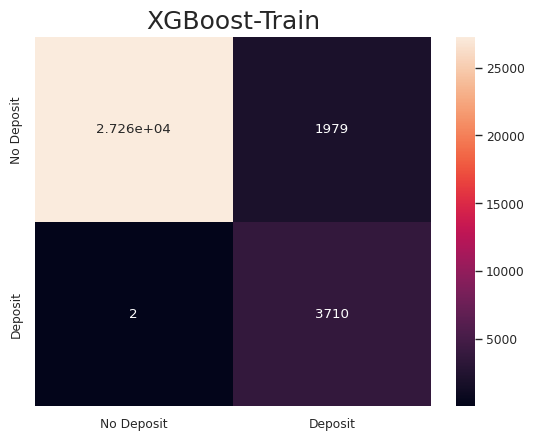

In [65]:
fig, ax = plt.subplots()
ax=sns.heatmap(xgb_clf_cm,annot=True, ax=ax, fmt='.4g')
ax.xaxis.set_ticklabels(['No Deposit','Deposit'])
ax.yaxis.set_ticklabels(['No Deposit','Deposit'])
ax.set_title('XGBoost-Train',fontsize=18)

print(xgb_clf_metrics.to_string(index=False))

## Results on Test set

In [66]:
y_pred = class_count_clf.predict(X_test)
class_count_clf_metrics, class_count_clf_cm = get_metrics("Class Count Classifier", y_pred, y_test)

y_pred = lr_clf.predict(X_test)
lr_clf_metrics, lr_clf_cm = get_metrics("Logistic Regression", y_pred, y_test)

y_pred = svm_clf.predict(X_test)
svm_clf_metrics, svm_clf_cm = get_metrics("SVM Classifier", y_pred, y_test)

y_pred = dt_clf.predict(X_test)
dt_clf_metrics, dt_clf_cm = get_metrics("Decision Tree Classifier", y_pred, y_test)

y_pred = rf_clf.predict(X_test)
rf_clf_metrics, rf_clf_cm = get_metrics("Random Forest Classifier", y_pred, y_test)

y_pred = xgb_clf.predict(X_test)
xgb_clf_metrics, xgb_clf_cm = get_metrics("XGBoost", y_pred, y_test)

In [68]:
results = pd.concat([class_count_clf_metrics,
                     lr_clf_metrics,
                     svm_clf_metrics,
                     dt_clf_metrics,
                     rf_clf_metrics,
                     xgb_clf_metrics],axis=0)

results.reset_index(drop=True)
# print(results.to_string(index=False))

,model,precision,recall,f1 score,accuracy,ROC AUC
0,Class Count Classifier,0.110521,0.112069,0.111289,0.798373,0.498784
1,Logistic Regression,0.433194,0.894397,0.583685,0.856276,0.872916
2,SVM Classifier,0.431303,0.923491,0.587993,0.854212,0.884454
3,Decision Tree Classifier,0.435560,0.892241,0.585366,0.857611,0.872728
4,Random Forest Classifier,0.474444,0.920259,0.626100,0.876184,0.895423
5,XGBoost,0.517173,0.843750,0.641278,0.893664,0.871875


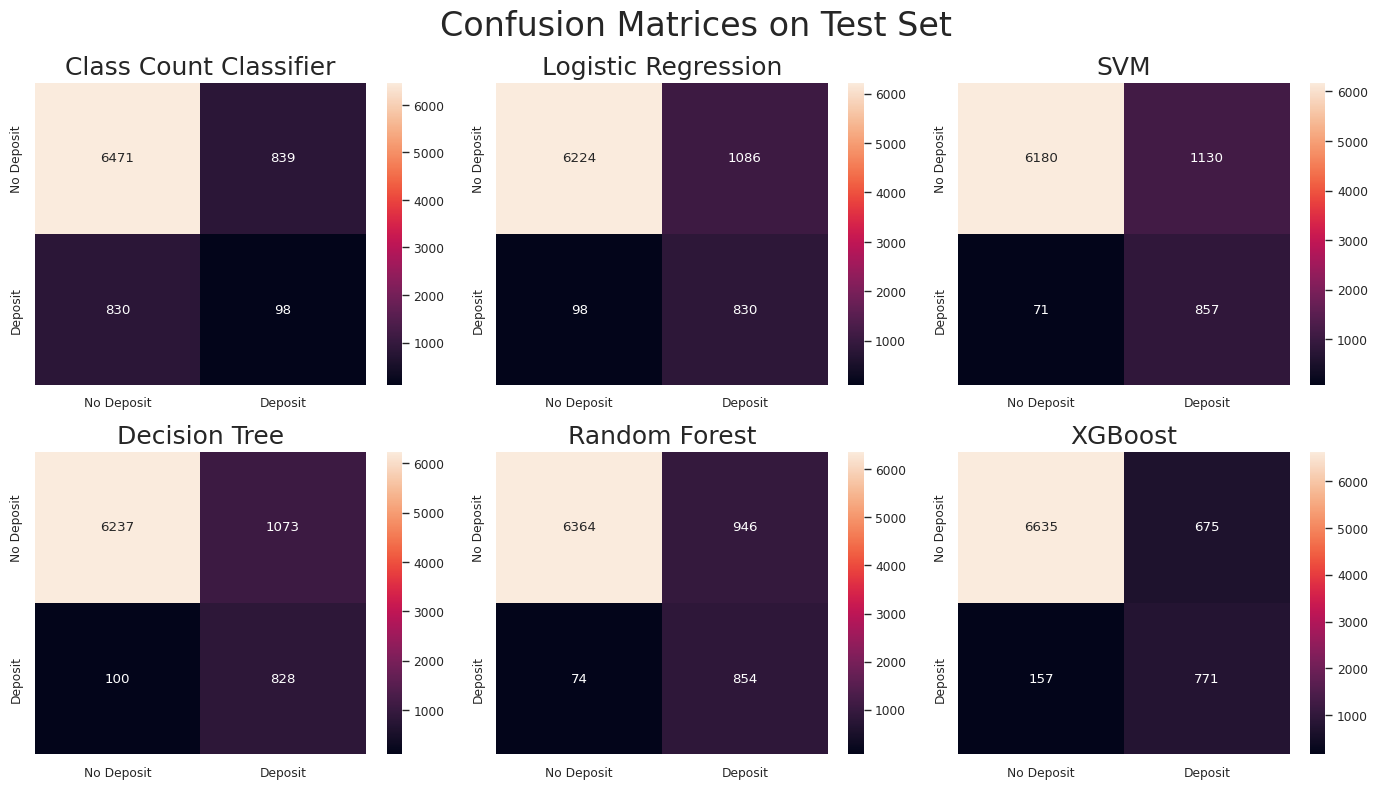

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
ax = ax.ravel()
ax[0]=sns.heatmap(class_count_clf_cm,annot=True, ax=ax[0], fmt='.4g')
ax[0].xaxis.set_ticklabels(['No Deposit','Deposit'])
ax[0].yaxis.set_ticklabels(['No Deposit','Deposit'])
ax[0].set_title('Class Count Classifier',fontsize=18)

ax[1]=sns.heatmap(lr_clf_cm,annot=True, ax=ax[1], fmt='.4g')
ax[1].xaxis.set_ticklabels(['No Deposit','Deposit'])
ax[1].yaxis.set_ticklabels(['No Deposit','Deposit'])
ax[1].set_title('Logistic Regression',fontsize=18)

ax[2]=sns.heatmap(svm_clf_cm,annot=True, ax=ax[2], fmt='.4g')
ax[2].xaxis.set_ticklabels(['No Deposit','Deposit'])
ax[2].yaxis.set_ticklabels(['No Deposit','Deposit'])
ax[2].set_title('SVM',fontsize=18)

ax[3]=sns.heatmap(dt_clf_cm,annot=True, ax=ax[3], fmt='.4g')
ax[3].xaxis.set_ticklabels(['No Deposit','Deposit'])
ax[3].yaxis.set_ticklabels(['No Deposit','Deposit'])
ax[3].set_title('Decision Tree',fontsize=18)

ax[4]=sns.heatmap(rf_clf_cm,annot=True, ax=ax[4], fmt='.4g')
ax[4].xaxis.set_ticklabels(['No Deposit','Deposit'])
ax[4].yaxis.set_ticklabels(['No Deposit','Deposit'])
ax[4].set_title('Random Forest',fontsize=18)

ax[5]=sns.heatmap(xgb_clf_cm,annot=True, ax=ax[5], fmt='.4g')
ax[5].xaxis.set_ticklabels(['No Deposit','Deposit'])
ax[5].yaxis.set_ticklabels(['No Deposit','Deposit'])
ax[5].set_title('XGBoost',fontsize=18)

fig.suptitle("Confusion Matrices on Test Set",fontsize=24)

plt.tight_layout()

## Feature Importance

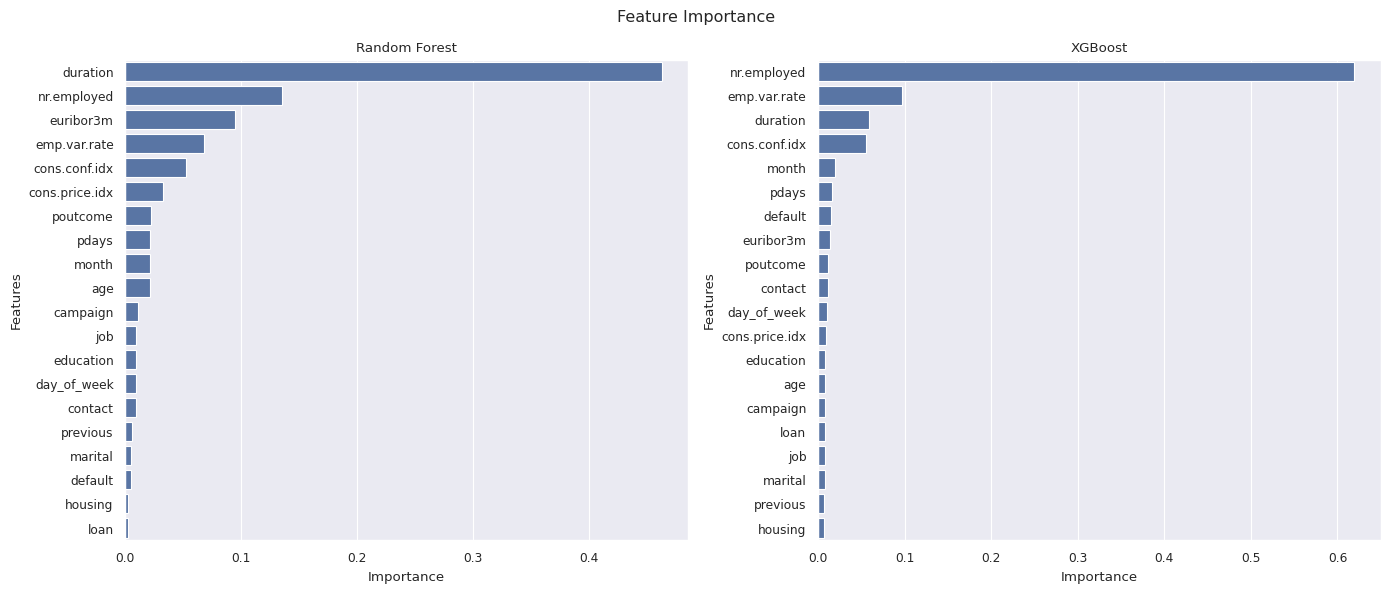

In [70]:
importance_rf = pd.DataFrame({
    'Features': feature_names,
    'Importance': rf_clf.feature_importances_
})
importance_xgb = pd.DataFrame({
    'Features': feature_names,
    'Importance': xgb_clf.feature_importances_
})

importance_rf = importance_rf.sort_values(by='Importance', ascending=False)
importance_xgb = importance_xgb.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots(ncols=2, figsize=(14,6))
ax[0]=sns.barplot(x='Importance', y='Features', data=importance_rf, ax=ax[0])
ax[0].set_title('Random Forest')

ax[1]=sns.barplot(x='Importance', y='Features', data=importance_xgb, ax=ax[1])
ax[1].set_title('XGBoost')

plt.suptitle('Feature Importance')
plt.tight_layout()
plt.show()